<a href="https://colab.research.google.com/github/xadicavadzade/product_sales_prediction/blob/main/product_sales_(2)_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# -----------------
# 1. Read Data
# -----------------
train_cut = pd.read_csv('/content/train_cut.csv')
stores = pd.read_csv('/content/stores.csv')
oil = pd.read_csv('/content/oil.csv')
items = pd.read_csv('/content/items.csv')
holidays_events = pd.read_csv('/content/holidays_events.csv')

train_cut['date'] = pd.to_datetime(train_cut['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

# -----------------
# 2. Train/Test
# -----------------

train_cut = train_cut.dropna(subset=['unit_sales'])
y = train_cut['unit_sales']
X = train_cut.drop(columns=['unit_sales'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

print("Train boyutu:", X_train.shape)
print("Test boyutu :", X_test.shape)

# -----------------
# 3. Main Data Pipeline (Holiday, Store, Item)
# -----------------
# This pipeline will handle holiday marking and merging store and item data
main_data_pipeline = Pipeline([
    ("holiday", HolidayMarker(holidays_events)),
    ("store_item", StoreItemMerger(stores, items))
])

# Fit and transform the train and test data using the main data pipeline
train_transformed_partial = main_data_pipeline.fit_transform(X_train)
test_transformed_partial = main_data_pipeline.transform(X_test)


# -----------------
# 4. Oil Interpolation and Merging (Separate Step)
# -----------------
# Instantiate the OilInterpolator
oil_interpolator = OilInterpolator()

# Fit the oil interpolator on the oil data
oil_interpolator.fit(oil)

# Transform the partially processed train and test data by merging with interpolated oil prices
X_train = oil_interpolator.transform(train_transformed_partial)
X_test  = oil_interpolator.transform(test_transformed_partial)


print("Train processed shape:", X_train.shape)
print("Test processed shape :", X_test.shape)

/tmp/ipython-input-3918241374.py:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_cut = pd.read_csv('/content/train_cut.csv')


Train boyutu: (5019881, 5)
Test boyutu : (1254971, 5)


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Train processed shape: (5019881, 14)
Test processed shape : (1254971, 14)


In [ ]:
train_cut.unit_sales.isna().sum()

np.int64(0)

In [ ]:
X_train

,id,date,store_nbr,item_nbr,onpromotion,is_holiday,city,state,type,cluster,family,class,perishable,dcoilwtico
0,2762229,2013-03-10,4,105577,NaN,0,Quito,Pichincha,D,9,GROCERY I,1045,0,86.650000
1,4424683,2013-04-17,51,759894,NaN,0,Guayaquil,Guayas,A,17,PERSONAL CARE,4126,0,86.650000
2,84194966,2016-07-06,17,1457160,False,0,Quito,Pichincha,C,12,HOME CARE,3104,0,47.370000
3,14647751,2013-11-28,27,742738,NaN,0,Daule,Guayas,D,1,PERSONAL CARE,4126,0,92.300000
4,86197442,2016-07-27,7,890825,False,0,Quito,Pichincha,D,8,GROCERY I,1060,0,41.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019876,31403083,2014-09-21,16,372369,False,0,Santo Domingo,Santo Domingo de los Tsachilas,C,3,DAIRY,2114,1,49.263333
5019877,44650917,2015-04-12,8,164037,False,1,Quito,Pichincha,D,8,GROCERY I,1048,0,49.336667
5019878,98457195,2016-11-30,26,1463603,False,0,Guayaquil,Guayas,D,10,BEVERAGES,1190,0,49.410000
5019879,86001137,2016-07-25,4,671062,False,1,Quito,Pichincha,D,9,DELI,2636,1,42.400000


In [ ]:

X_train["date"] = pd.to_datetime(X_train["date"], errors="coerce")
X_test["date"] = pd.to_datetime(X_test["date"], errors="coerce")

for df in [X_train, X_test]:
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df["dayofweek"] = df["date"].dt.dayofweek
    df["is_weekend"] = df["dayofweek"].isin([5,6]).astype(int)

X_train = X_train.drop(columns=["date"])
X_test = X_test.drop(columns=["date"])
X_train = X_train.drop(columns=["onpromotion"])
X_test = X_test.drop(columns=["onpromotion"]) # Drop from X_test as well
X_train = X_train.drop(columns=["id"])
X_test = X_test.drop(columns=["id"])
X_train = X_train.drop(columns=["item_nbr"])
X_test = X_test.drop(columns=["item_nbr"])



visualation for relationshipssss


In [ ]:
X_train

,store_nbr,is_holiday,city,state,type,cluster,family,class,perishable,dcoilwtico,year,month,day,dayofweek,is_weekend
0,4,0,Quito,Pichincha,D,9,GROCERY I,1045,0,86.650000,2013,3,10,6,1
1,51,0,Guayaquil,Guayas,A,17,PERSONAL CARE,4126,0,86.650000,2013,4,17,2,0
2,17,0,Quito,Pichincha,C,12,HOME CARE,3104,0,47.370000,2016,7,6,2,0
3,27,0,Daule,Guayas,D,1,PERSONAL CARE,4126,0,92.300000,2013,11,28,3,0
4,7,0,Quito,Pichincha,D,8,GROCERY I,1060,0,41.900000,2016,7,27,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019876,16,0,Santo Domingo,Santo Domingo de los Tsachilas,C,3,DAIRY,2114,1,49.263333,2014,9,21,6,1
5019877,8,1,Quito,Pichincha,D,8,GROCERY I,1048,0,49.336667,2015,4,12,6,1
5019878,26,0,Guayaquil,Guayas,D,10,BEVERAGES,1190,0,49.410000,2016,11,30,2,0
5019879,4,1,Quito,Pichincha,D,9,DELI,2636,1,42.400000,2016,7,25,0,0


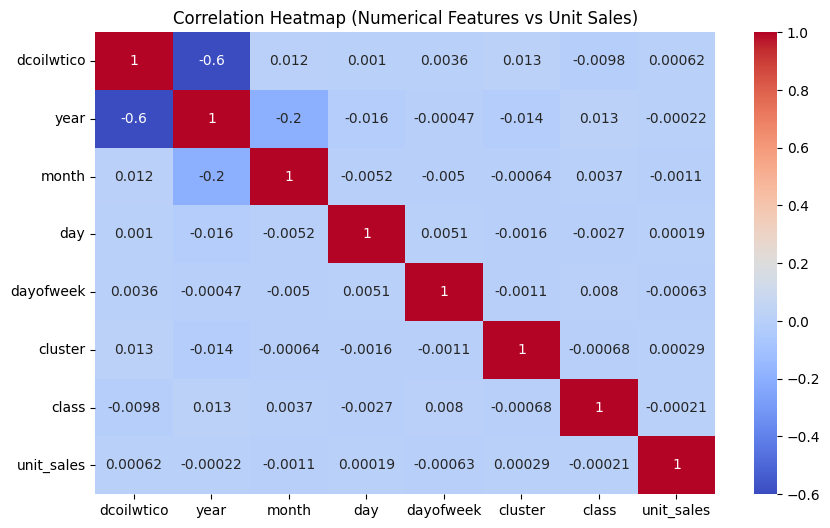

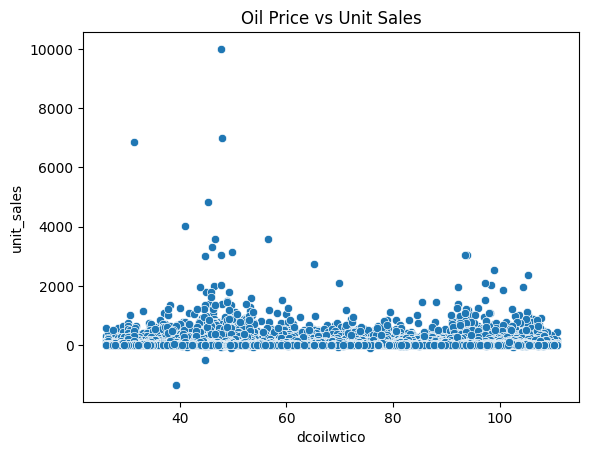

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["dcoilwtico", "year", "month", "day", "dayofweek", "cluster", "class"]
sample_df = X_train.copy()
sample_df["unit_sales"] = y_train

plt.figure(figsize=(10,6))
sns.heatmap(sample_df[num_cols + ["unit_sales"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features vs Unit Sales)")
plt.show()

sns.scatterplot(x=sample_df["dcoilwtico"], y=y_train) # y_train = unit_sales
plt.title("Oil Price vs Unit Sales")
plt.show()


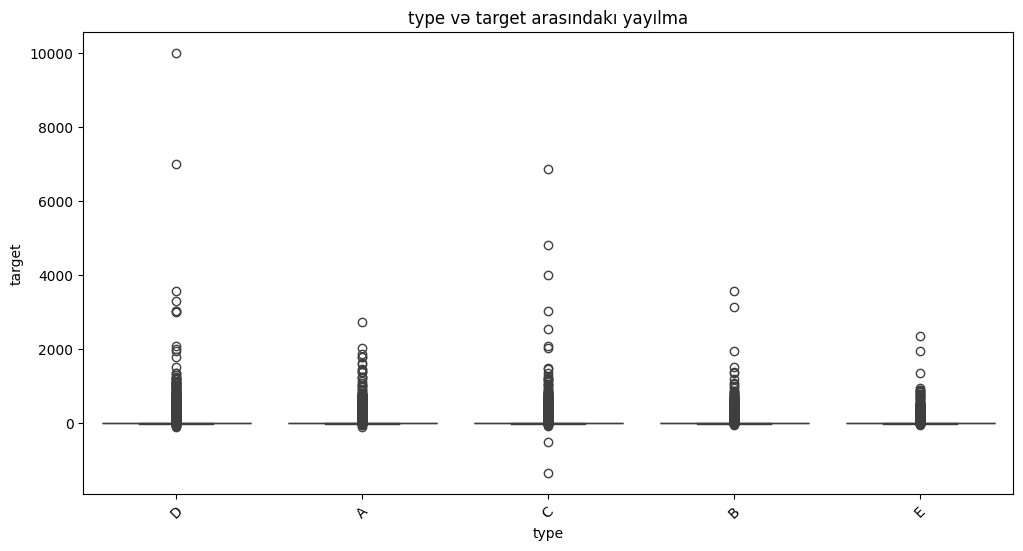

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = X_train.copy()
df["target"] = y_train

cat_col = "type"

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y="target", data=df)
plt.title(f"{cat_col} və target arasındakı yayılma")
plt.xticks(rotation=45)
plt.show()


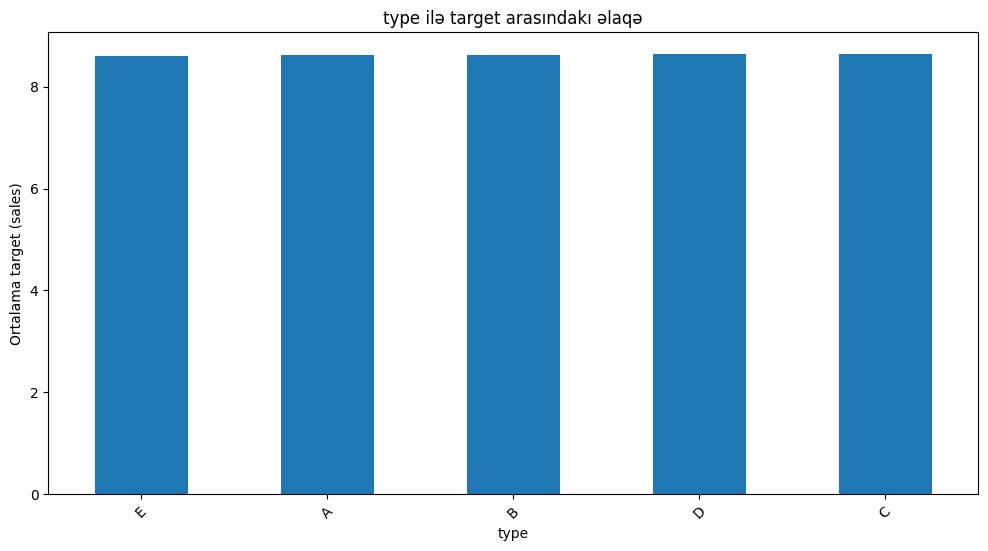

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = X_train.copy()
df["target"] = y_train

cat_col = "type"

mean_sales = df.groupby(cat_col)["target"].mean().sort_values()

plt.figure(figsize=(12,6))
mean_sales.plot(kind="bar")
plt.title(f"{cat_col} ilə target arasındakı əlaqə")
plt.ylabel("Ortalama target (sales)")
plt.xlabel(cat_col)
plt.xticks(rotation=45)
plt.show()


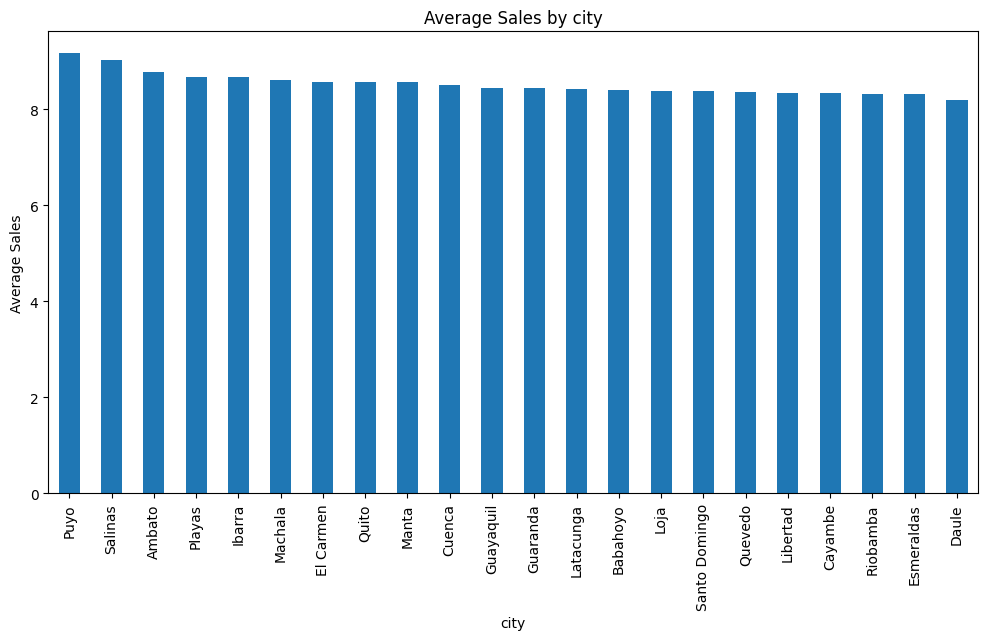

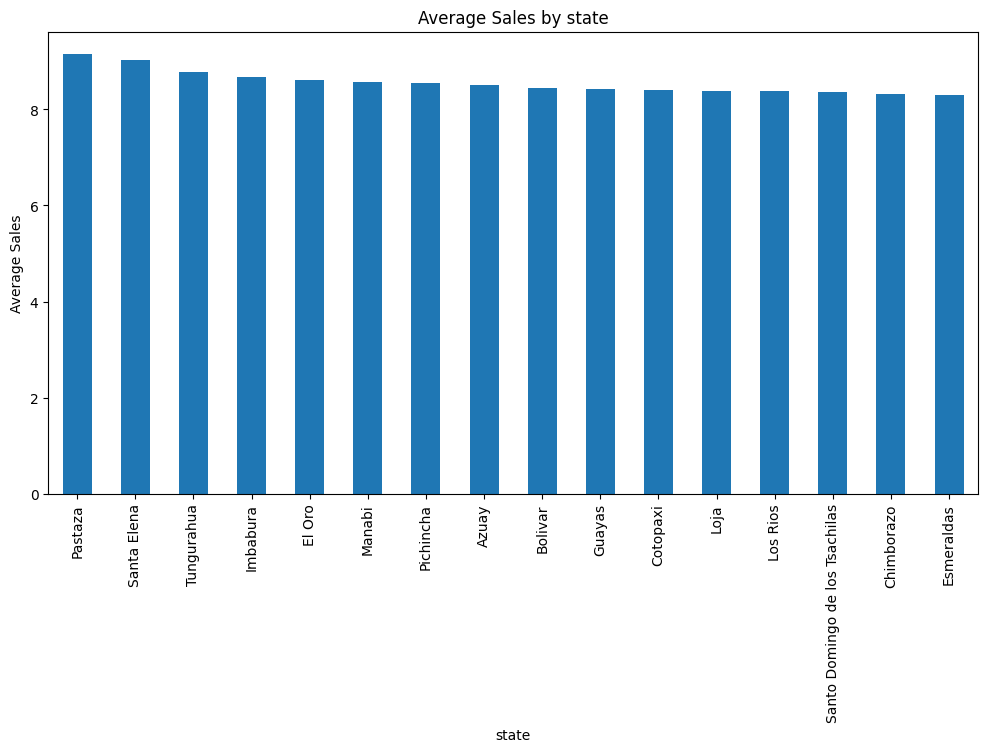

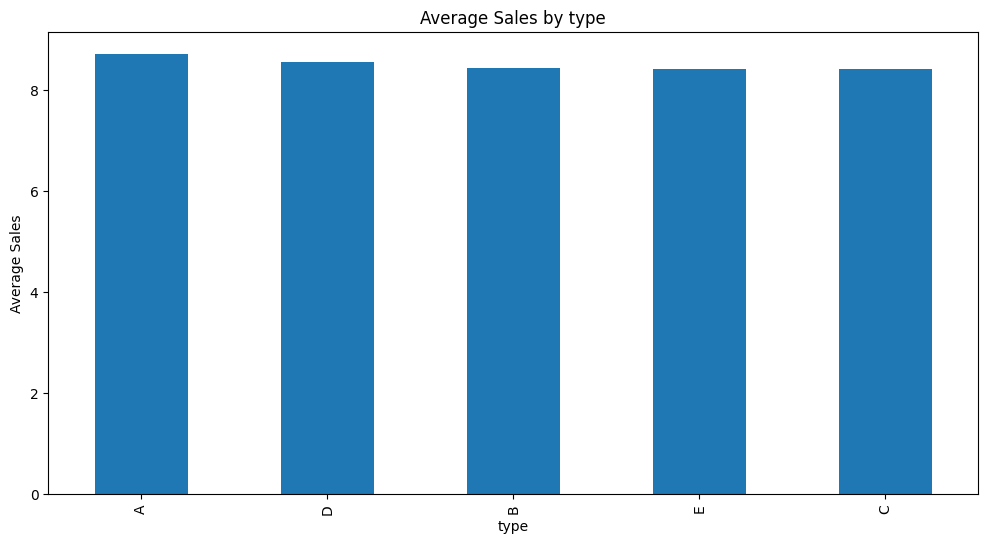

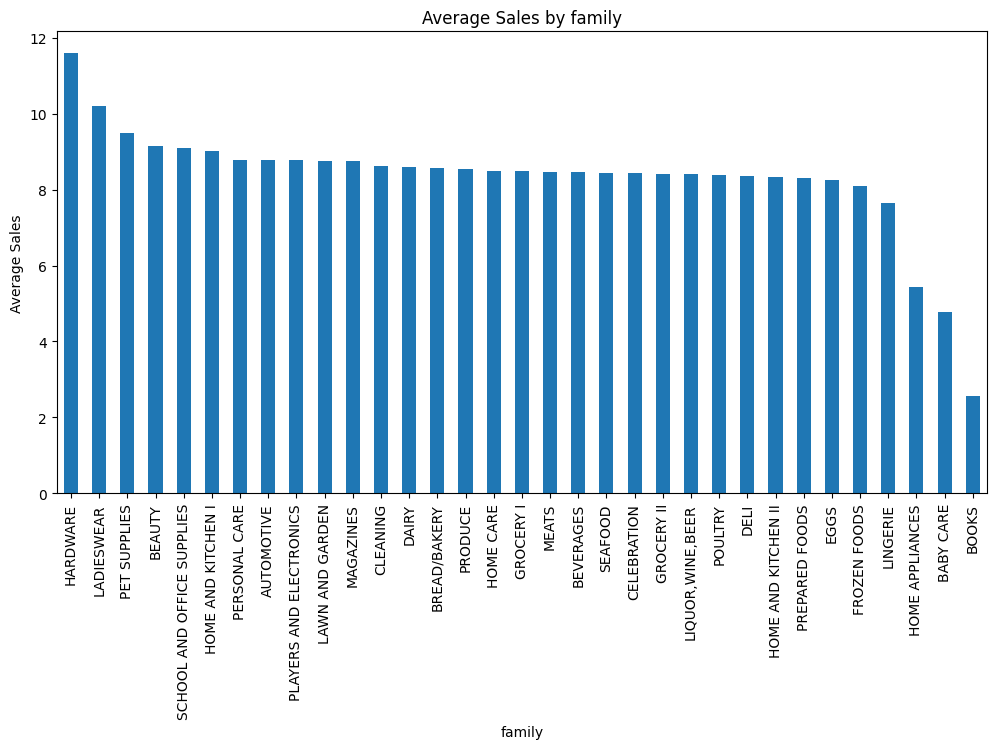

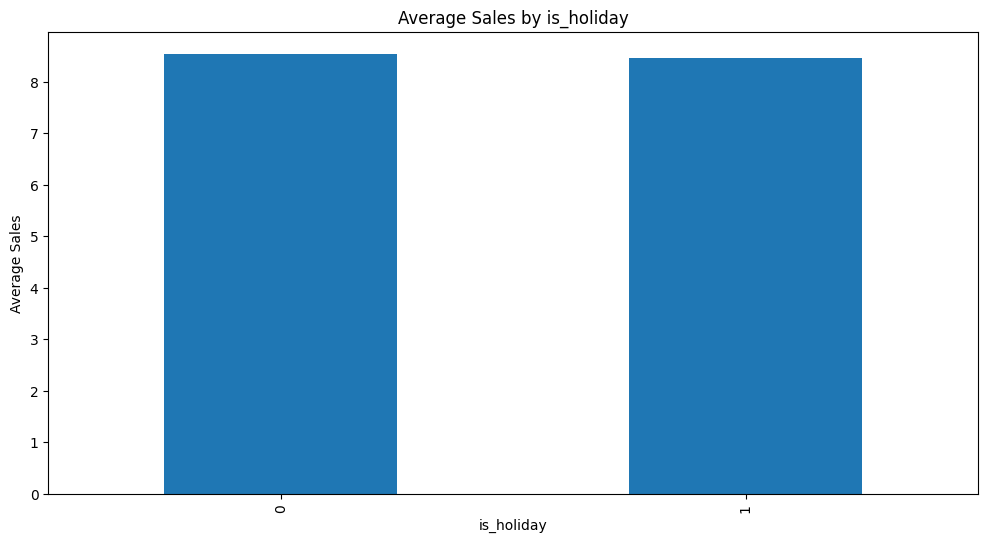

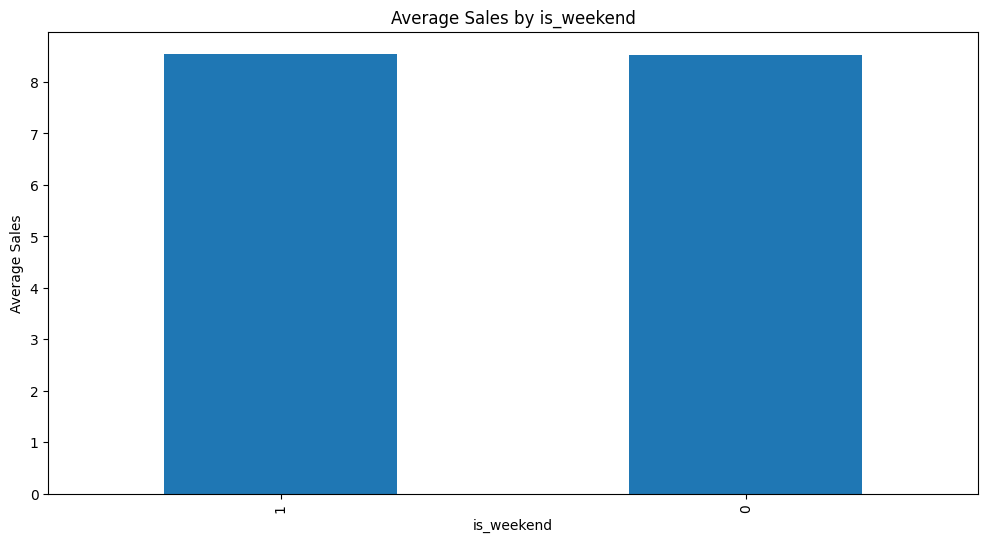

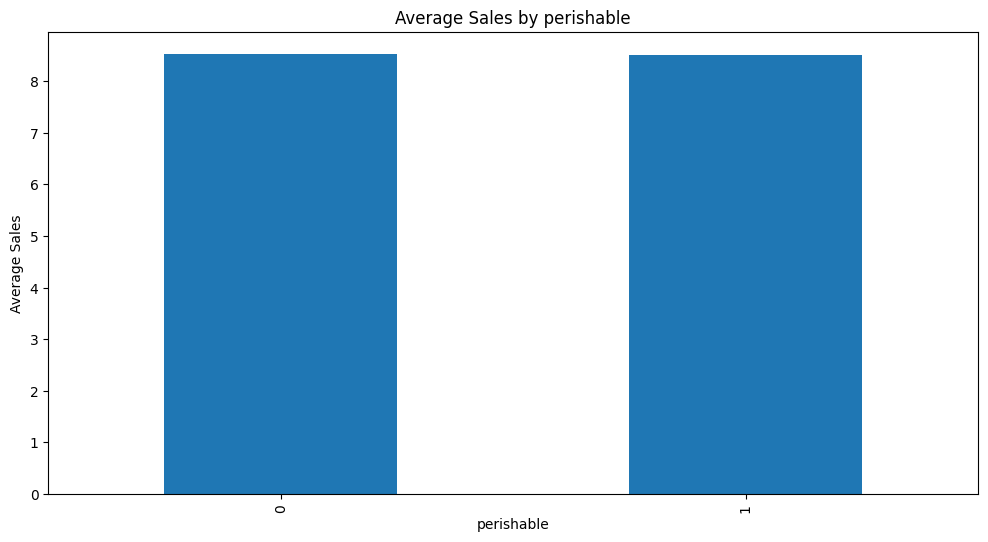

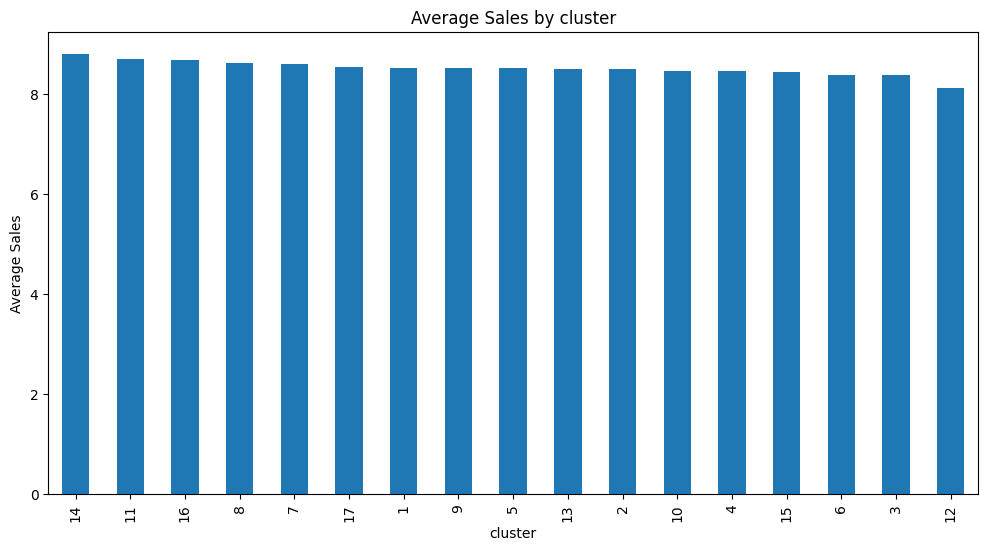

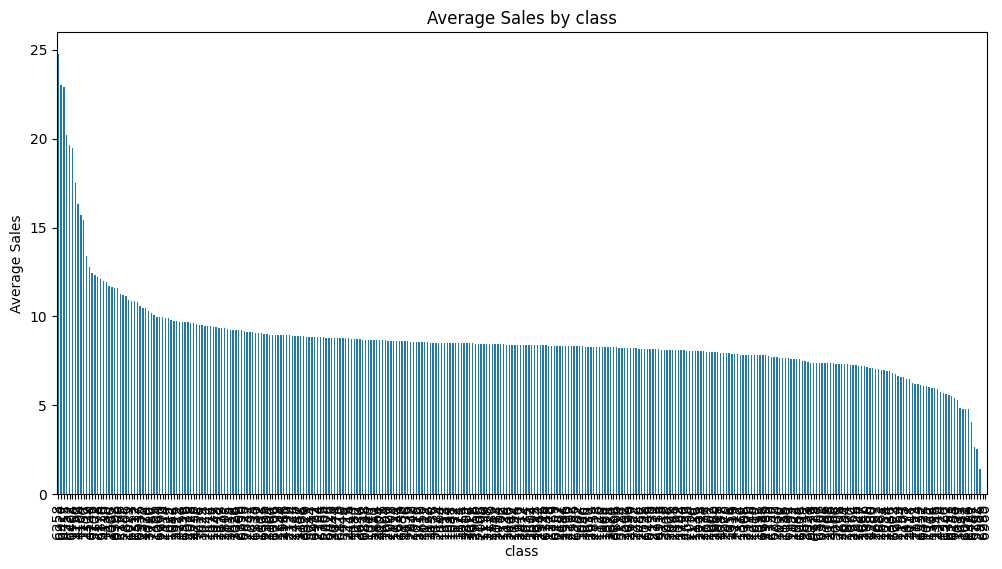

In [ ]:
import matplotlib.pyplot as plt

train_df = X_train.copy()
train_df["sales"] = y_train
train_df = train_df.sample(n=500_000, random_state=42)


cat_cols = ["city", "state", "type", "family", "is_holiday",
            "is_weekend", "perishable", "cluster", "class"]

for col in cat_cols:
    plt.figure(figsize=(12,6))
    (train_df.groupby(col)["sales"]
             .mean()
             .sort_values(ascending=False)
             .plot(kind="bar"))
    plt.xlabel(col)
    plt.ylabel("Average Sales")
    plt.title(f"Average Sales by {col}")
    plt.show()


In [ ]:
import pandas as pd

def frequency_encoding(train, test, cols):
    for col in cols:
        freq = train[col].value_counts()
        train[col] = train[col].map(freq)
        test[col] = test[col].map(freq).fillna(0)
    return train, test


def one_hot_encoding(train, test, cols):
    train = pd.get_dummies(train, columns=cols, drop_first=True)
    test = pd.get_dummies(test, columns=cols, drop_first=True)

    test = test.reindex(columns=train.columns, fill_value=0)
    return train, test

high_card_cols = ["city", "state", "family"]
low_card_cols  = ["type", "is_holiday", "is_weekend", "perishable"]

X_train_enc, X_test_enc = frequency_encoding(X_train.copy(), X_test.copy(), high_card_cols)
X_train_enc, X_test_enc = one_hot_encoding(X_train_enc, X_test_enc, low_card_cols)

y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


sample_size = 50000  # sample number
sample_indices = np.random.choice(X_train_enc.shape[0], size=sample_size, replace=False)
X_train_sample = X_train_enc.iloc[sample_indices]
y_train_sample = y_train.iloc[sample_indices]


rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train_sample, y_train_sample)

y_pred = rf_model.predict(X_test_enc)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 420.17058061024113
R^2 Score: 0.06331317983822393
